[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tuankhoin/COMP30027-Practical-Solutions/blob/main/Week%210.ipynb)

###### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2022 Semester 1

## Week 10 - Hidden Markov Model
Good news, no Assignments on this!

Bad news, it is examinable.

* Viterbi Algorithm
* Exhaustive method
* Supervised training HMM

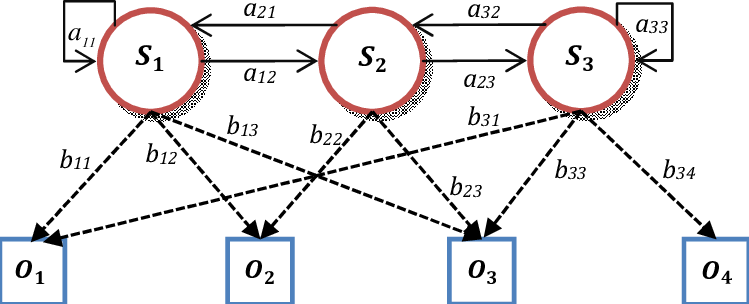

#### Exercise 1.(a) - Viterbi algorithm (step-by-step)

Here we'll show how the Viterbi algorithm works for HMMs, assuming we have a trained model to start with.

In [34]:
import numpy as np

Set the HMM transition matrix, output probability matrix and initial probabilities



In [35]:
#hidden states / tags / labels
tagNames = 'NNP', 'MD', 'VB', 'JJ', 'NN', 'RB', 'DT'
tags = 0, 1, 2, 3, 4, 5, 6
tag_dict = {0: 'NNP',
           1: 'MD',
           2: 'VB',
           3: 'JJ',
           4: 'NN',
           5: 'RB',
           6: 'DT'}
#observations
wordNames = 'Janet', 'will', 'back', 'the', 'bill'
words = 0, 1, 2, 3, 4

#transition probs
A = np.array([
    [0.3777, 0.0110, 0.0009, 0.0084, 0.0584, 0.0090, 0.0025],
    [0.0008, 0.0002, 0.7968, 0.0005, 0.0008, 0.1698, 0.0041],
    [0.0322, 0.0005, 0.0050, 0.0837, 0.0615, 0.0514, 0.2231],
    [0.0366, 0.0004, 0.0001, 0.0733, 0.4509, 0.0036, 0.0036],
    [0.0096, 0.0176, 0.0014, 0.0086, 0.1216, 0.0177, 0.0068],
    [0.0068, 0.0102, 0.1011, 0.1012, 0.0120, 0.0728, 0.0479],
    [0.1147, 0.0021, 0.0002, 0.2157, 0.4744, 0.0102, 0.0017]
    ])

#initial state probabilities
pi = np.array([0.2767, 0.0006, 0.0031, 0.0453, 0.0449, 0.0510, 0.2026])

#output probability probs
B = np.array([
    [0.000032, 0, 0, 0.000048, 0],
    [0, 0.308431, 0, 0, 0],
    [0, 0.000028, 0.000672, 0, 0.000028],
    [0, 0, 0.000340, 0.000097, 0],
    [0, 0.000200, 0.000223, 0.000006, 0.002337],
    [0, 0, 0.010446, 0, 0],
    [0, 0, 0, 0.506099, 0]
    ])


Now we'll code the Viterbi algorithm. It keeps a store of two components, the best scores to reach a state at a given time, and the last step of the path to get there. Scores delta are initialised to -inf to denote that we haven't set them yet. 

Initialisation:

* initialise delta 
* initialise backpointer (psi) parameters

$$ \delta_t(i) = -\inf$$
$$\textrm{backpointers} \quad \psi_1(i) = 0 \quad \textrm{for all timesteps and states}$$ 

In [36]:
delta = np.zeros((len(tags), len(words))) # states x time steps
delta[:,:] = float('-inf')
backpointers = np.zeros((len(tags), len(words)), 'int')

The base case for the recursion sets the starting state probs based on pi and generating the observation. (Note: we also change Numpy precision when printing for better viewing)

$$\delta_1(i) = \pi_ib_i(o_1),\,\, 1\le i \le N$$

In [37]:
# base case, time step 0
delta[:, 0] = pi * B[:,0]  #0:Janet
np.set_printoptions(precision=2)
print(delta)

[[8.85e-06     -inf     -inf     -inf     -inf]
 [0.00e+00     -inf     -inf     -inf     -inf]
 [0.00e+00     -inf     -inf     -inf     -inf]
 [0.00e+00     -inf     -inf     -inf     -inf]
 [0.00e+00     -inf     -inf     -inf     -inf]
 [0.00e+00     -inf     -inf     -inf     -inf]
 [0.00e+00     -inf     -inf     -inf     -inf]]


Now for the recursive step, where we maximise over incoming transitions reusing the best incoming score, computed above.

 $$\delta_t(j) = \max_{1\le i \le N} \left(\delta_{t-1}(i)a_{ij}\right) b_j(o_t),\,\, 2\le t \le T,\,\, 1\le j\le N$$
 
 $$ \psi_t(j) = \textrm{argmax}_{1\le i \le N} \left(\delta_{t-1}(i)a_{ij}\right),\,\, 2\le t \le T,\,\, 1\le j\le N$$

In [38]:
# time step 1
for t1 in tags:
    for t0 in tags:
        score = delta[t0, 0] * A[t0, t1] * B[t1, 1]  #2: will
        if score > delta[t1, 1]:
            delta[t1, 1] = score
            backpointers[t1, 1] = t0
print(delta)

[[8.85e-06 0.00e+00     -inf     -inf     -inf]
 [0.00e+00 3.00e-08     -inf     -inf     -inf]
 [0.00e+00 2.23e-13     -inf     -inf     -inf]
 [0.00e+00 0.00e+00     -inf     -inf     -inf]
 [0.00e+00 1.03e-10     -inf     -inf     -inf]
 [0.00e+00 0.00e+00     -inf     -inf     -inf]
 [0.00e+00 0.00e+00     -inf     -inf     -inf]]


Note that the running maximum for any incoming state (t0) is maintained in delta[1,t1], and the winning state is stored in addition, as a backpointer. 

Repeat with the next observations. (We'd do this as a loop over positions in practice.)

In [39]:
# time step 2
for t2 in tags:
    for t1 in tags:
        score = delta[t1, 1] * A[t1, t2] * B[t2, 2]  #2:back
        if score > delta[t2, 2]:
            delta[t2, 2] = score
            backpointers[t2, 2] = t1
print(delta)

[[8.85e-06 0.00e+00 0.00e+00     -inf     -inf]
 [0.00e+00 3.00e-08 0.00e+00     -inf     -inf]
 [0.00e+00 2.23e-13 1.61e-11     -inf     -inf]
 [0.00e+00 0.00e+00 5.11e-15     -inf     -inf]
 [0.00e+00 1.03e-10 5.36e-15     -inf     -inf]
 [0.00e+00 0.00e+00 5.33e-11     -inf     -inf]
 [0.00e+00 0.00e+00 0.00e+00     -inf     -inf]]


In [40]:
# time step 3
for t3 in tags:
    for t2 in tags:
        score = delta[t2, 2] * A[t2, t3] * B[t3, 3]  #3:the
        if score > delta[t3, 3]:
            delta[t3, 3] = score
            backpointers[t3, 3] = t2
print(delta)

[[8.85e-06 0.00e+00 0.00e+00 2.49e-17     -inf]
 [0.00e+00 3.00e-08 0.00e+00 0.00e+00     -inf]
 [0.00e+00 2.23e-13 1.61e-11 0.00e+00     -inf]
 [0.00e+00 0.00e+00 5.11e-15 5.23e-16     -inf]
 [0.00e+00 1.03e-10 5.36e-15 5.94e-18     -inf]
 [0.00e+00 0.00e+00 5.33e-11 0.00e+00     -inf]
 [0.00e+00 0.00e+00 0.00e+00 1.82e-12     -inf]]


In [41]:
# time step 4
for t4 in tags:
    for t3 in tags:
        score = delta[t3, 3] * A[t3, t4] * B[t4, 4]  #4:bill
        if score > delta[t4, 4]:
            delta[t4, 4] = score
            backpointers[t4, 4] = t3
print(delta)

[[8.85e-06 0.00e+00 0.00e+00 2.49e-17 0.00e+00]
 [0.00e+00 3.00e-08 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 2.23e-13 1.61e-11 0.00e+00 1.02e-20]
 [0.00e+00 0.00e+00 5.11e-15 5.23e-16 0.00e+00]
 [0.00e+00 1.03e-10 5.36e-15 5.94e-18 2.01e-15]
 [0.00e+00 0.00e+00 5.33e-11 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 1.82e-12 0.00e+00]]


Now read of the best final state:

In [42]:
t4 = np.argmax(delta[:, 4])
print(tag_dict[t4])

NN


We need to work out the rest of the path which is the best way to reach the final state, t2. We can work this out by taking a step backwards looking at the best incoming edge, i.e., as stored in the backpointers.

In [43]:
t3 = backpointers[t4, 4]
print(tag_dict[t3])

DT


Repeat this until we reach the start of the sequence.

In [44]:
t2 = backpointers[t3, 3]
print(tag_dict[t2])
t1 = backpointers[t2, 2]
print(tag_dict[t1])
t0 = backpointers[t1, 1]
print(tag_dict[t0])

VB
MD
NNP


*Phew! The best state sequence is t = [NNP MD VB DT NN]*

#### Exercise 1.(b) Formalising things

Now we can put this all into a function to handle arbitrary length inputs 

In [45]:
def viterbi(params, words):
    pi, A, B = params
    N = len(words)
    T = pi.shape[0]
    
    delta = np.zeros((T, N))
    delta[:, :] = float('-inf')
    backpointers = np.zeros((T, N), 'int')
    
    # base case
    delta[:, 0] = pi * B[:, words[0]]
    
    # recursive case
    for w in range(1, N):
        for t2 in range(T):
            for t1 in range(T):
                score = delta[t1, w-1] * A[t1, t2] * B[t2, words[w]]
                if score > delta[t2, w]:
                    delta[t2, w] = score
                    backpointers[t2, w] = t1
    
    # now follow backpointers to resolve the state sequence
    output = []
    output.append(np.argmax(delta[:, N-1]))
    for i in range(N-1, 0, -1):
        output.append(backpointers[output[-1], i])
    
    return list(reversed(output)), np.max(delta[:, N-1])

Let's test the method on the same input, and a longer input observation sequence. Notice that we are using only 5 words as the vocabulary so we have to restrict tests to sentences containing only these words.

In [46]:
output, score = viterbi((pi, A, B), [0, 1, 2, 3, 4])  #[Janet, will, back, the, bill]
print([tag_dict[o] for o in output])
print(score)

['NNP', 'MD', 'VB', 'DT', 'NN']
2.013570710221386e-15


In [47]:
output, score = viterbi((pi, A, B), [0, 1, 2, 3, 0, 2, 4])  #[Janet, will, back, the, Janet, back, bill]
print([tag_dict[o] for o in output])
print(score)

['NNP', 'MD', 'VB', 'DT', 'NNP', 'NN', 'NN']
2.4671007551487516e-26


#### Exercise 2 - Exhaustive method

Let's verify that we've done the above algorithm correctly by implementing exhaustive search, which forms the cross-product of states^M.

In [48]:
from itertools import product

def exhaustive(params, words):
    pi, A, B = params
    N = len(words)
    T = pi.shape[0]
    
    # track the running best sequence and its score
    best = (None, float('-inf'))
    # loop over the cartesian product of |states|^M
    num_sequences = 0
    for ss in product(range(T), repeat=N):
        num_sequences += 1
        # score the state sequence
        score = pi[ss[0]] * B[ss[0], words[0]]
        for i in range(1, N):
            score *= A[ss[i-1], ss[i]] * B[ss[i], words[i]]
        # update the running best
        if score > best[1]:
            best = (ss, score)
    print(f"num sequences:{num_sequences}")
    return best

In [49]:
output, score = exhaustive((pi, A, B), [0, 1, 2, 3, 4])  #[Janet, will, back, the, bill]
print([tag_dict[o] for o in output])
print(score)

num sequences:16807
['NNP', 'MD', 'VB', 'DT', 'NN']
2.0135707102213855e-15


In [51]:
output, score = exhaustive((pi, A, B), [0, 1, 2, 3, 0, 2, 4])  #[Janet, will, back, the, Janet, back, bill]
print([tag_dict[o] for o in output])
print(score)

num sequences:823543
['NNP', 'MD', 'VB', 'JJ', 'NN', 'RB', 'DT']
2.4671007551487507e-26


Yay, it got the same results as before. Note that the exhaustive method is not practical on anything beyond toy data due to the nasty cartesian product. But it is worth doing to verify the Viterbi code above is getting the right results. 

#### Exercise 3- Supervised training, aka "visible" Markov model

Let's train the HMM parameters on the Penn Treebank, using the sample from NLTK. Note that this is a small fraction of the treebank, so we shouldn't expect great performance of our method trained only on this data.

In [52]:
import nltk
from nltk.corpus import treebank
nltk.download('treebank')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


True

In [53]:
corpus = treebank.tagged_sents()
print(len(corpus))
[print(w) for w in corpus[0]]
'Can you see how it works?'

3914
('Pierre', 'NNP')
('Vinken', 'NNP')
(',', ',')
('61', 'CD')
('years', 'NNS')
('old', 'JJ')
(',', ',')
('will', 'MD')
('join', 'VB')
('the', 'DT')
('board', 'NN')
('as', 'IN')
('a', 'DT')
('nonexecutive', 'JJ')
('director', 'NN')
('Nov.', 'NNP')
('29', 'CD')
('.', '.')


'Can you see how it works?'

We have to first map words and tags to numbers for compatibility with the above methods.

In [54]:
word_numbers = {}
tag_numbers = {}

num_corpus = []
for sent in corpus:
    num_sent = []
    for word, tag in sent:
        wi = word_numbers.setdefault(word.lower(), len(word_numbers))
        ti = tag_numbers.setdefault(tag, len(tag_numbers))
        num_sent.append((wi, ti))
    num_corpus.append(num_sent)
    
word_names = [None] * len(word_numbers)
for word, index in word_numbers.items():
    word_names[index] = word
tag_names = [None] * len(tag_numbers)
for tag, index in tag_numbers.items():
    tag_names[index] = tag

Now let's hold out the last few sentences for testing, so that they are unseen during training and give a more reasonable estimate of accuracy on fresh text.

In [55]:
training = num_corpus[:-10] # reserve the last 10 sentences for testing
testing = num_corpus[-10:]

Next we compute relative frequency estimates based on the observed tag and word counts in the training set. Note that smoothing is important, here we add a small constant to all counts. 

  $$P(s_j|s_i) = \frac{\mathrm{freq}(s_i,s_j)}{\mathrm{freq}(s_i)} = a_{ij}$$
      
  $$P(o_k|s_i) = \frac{\mathrm{freq}(o_k,s_i)}{\mathrm{freq}(s_i)} = b_{i}(o_k)$$

  $$P(q_1 = s_i) = \frac{\mathrm{freq}(q_1 = s_i)}{\sum_j\mathrm{freq}(q_1 = s_j)} = \pi_{i}$$

In [56]:
S = len(tag_numbers)
V = len(word_numbers)

# initalise with epsilon rather than zero (smoothing)
eps = 0.1
pi = eps * np.ones(S) # initial
A = eps * np.ones((S, S)) #transition
B = eps * np.ones((S, V)) #output probability

# count
for sent in training:
    last_tag = None
    for word, tag in sent:
        B[tag, word] += 1
        if last_tag == None:
            pi[tag] += 1
        else:
            A[last_tag, tag] += 1
        last_tag = tag
        
# normalise
pi /= np.sum(pi)
for s in range(S):
    B[s,:] /= np.sum(B[s,:])
    A[s,:] /= np.sum(A[s,:])

Now we're ready to use our Viterbi method defined above

In [57]:
predicted, score = viterbi((pi, A, B), list(map(lambda w_t: w_t[0], testing[0])))

In [58]:
print('%20s\t%5s\t%5s' % ('TOKEN', 'TRUE', 'PRED'))
for (wi, ti), pi in zip(testing[0], predicted):
    print('%20s\t%5s\t%5s' % (word_names[wi], tag_names[ti], tag_names[pi]))

               TOKEN	 TRUE	 PRED
                   a	   DT	   DT
               white	  NNP	  NNP
               house	  NNP	  NNP
           spokesman	   NN	   NN
                said	  VBD	  VBD
                last	   JJ	   JJ
                week	   NN	   NN
                that	   IN	   IN
                 the	   DT	   DT
           president	   NN	   NN
                  is	  VBZ	  VBZ
         considering	  VBG	  VBG
                 *-1	-NONE-	-NONE-
           declaring	  VBG	  VBG
                that	   IN	   IN
                 the	   DT	   DT
        constitution	  NNP	  NNP
          implicitly	   RB	  NNP
               gives	  VBZ	  VBZ
                 him	  PRP	  PRP
                 the	   DT	   DT
           authority	   NN	   NN
                 for	   IN	   IN
                   a	   DT	   DT
           line-item	   JJ	   JJ
                veto	   NN	   NN
                 *-2	-NONE-	-NONE-
                  to	   TO	   TO
             provoke	   VB	   VB
      